# Introduction to machine learning

*Maxime Sangnier*

Fall, 2021

## Practical session 1: discriminant analysis, logistic regression and boosting

# Table of contents
1. [Discriminant analysis](#part1)
    - [Linear discriminant analysis](#part1sec1)
    - [Quadratic discriminant analysis](#part1sec2)
    - [Fisher discriminant analysis](#part1sec3)
1. [Logistic regression](#part2)
1. [Adaboost](#part3)


In [5]:
from mllab import *


Packages:
	nympy as np
	matplotlib.pyplot as plt
	seaborn as sns

Functions:
	plotXY
	plot_frontiere
	map_regions
	covariance
	plot_cov
	sample_gmm
	scatter
	plot_level_set
	gaussian_sample



# Discriminant analysis <a id="part1"></a>
## Linear discriminant analysis <a id="part1sec1"></a>
>The `covariance` function makes it possible to build a $2 \times 2$ covariance matrix based on spreads $\sigma_1$ and $\sigma_2$, and the angle $\theta$.

In [4]:
covariance?

Signature: covariance(sigma1=1.0, sigma2=1.0, theta=0.0)
Docstring: Covariance matrix with eigenvalues sigma1 and sigma2, rotated by the angle theta.
File:      ~/Desktop/m2a_sorbonne/TP/IAS/TP01/mllab.py
Type:      function


>Based on the Cholesky decomposition of a $2 \times 2$ covariance matrix $\Sigma$, write a function that generates a multivariate Gaussian $n$-sample of mean $\mu \in \mathbb R^2$ and covariance $\Sigma$.
The corresponding numpy array should be of size $(n, 2)$.

>Compute the mean and the empirical covariance of the sample using Numpy routines.

In [5]:
# Answer
def gaussian_sample(mu=[0, 0], sigma1=1., sigma2=1., theta=0., n=50):
    L = np.linalg.cholesky(covariance(sigma1, sigma2, theta)).T  # cov = L.T.dot(L)
    x = L.dot(np.random.randn(2, n)).T + np.array(mu)
    return x

X = gaussian_sample(sigma1=1, sigma2=10, n=500)
print("Mean is:", X.mean(axis=0))
print("Covariance is:", np.cov(X.T))


Mean is: [-0.03398036 -0.05592114]
Covariance is: [[0.9563029  0.13144385]
 [0.13144385 9.31164641]]


In [3]:
def gaussian_sample(mu=[0, 0], sigma1=1., sigma2=1., theta=0., n=50, random_state=None):
    cov = covariance(sigma1, sigma2, theta)
    x = multivariate_normal.rvs(mean=mu, cov=cov, size=n, random_state=random_state)
    return x


>Generate two multivariate Gaussian samples of size $n_1 = n_2 = 50$ with different means and equal covariance matrices.
Plot both samples with different markers by using the function `plotXY`.

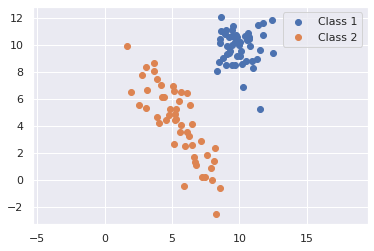

In [4]:
# Answer
X1 = gaussian_sample(mu=[5, 5], sigma1=10, sigma2=1, theta=30)
X2 = gaussian_sample(mu=[10, 10])
plotXY(X1, X2, legend=True)

>Based on the following code, implement a linear discriminant classifier, taking as parameters an $n \times 2$ Numpy array as data and a size-$n$ array of labels.

In [58]:
# Answer
from sklearn.base import BaseEstimator
from sklearn.discriminant_analysis import LinearClassifierMixin

class myLDA(BaseEstimator, LinearClassifierMixin):
    """
        LDA classifier for two classes.
    """
    def __init__(self, prior=None):
        """
            prior: whether to use prior in the intercept. Default is false.
        """
        self.prior = prior
        
    def fit(self, X, y):
        # Estimate covariance matrix and means
        # Todo

        # End todo
        if not self.prior:
            pi1, pi2 = 0.5, 0.5
        else:
            pi1, pi2 = np.mean(y == y.max()), np.mean(y == y.min())
        # Compute direction and intercept
        # Todo
        X1 = X[y == y.max(),:]
        X2 = X[y == y.min(),:]
#         y1 = y[y == y.max()]
#         y2 = y[y == y.min()]
        mu1 = X1.mean(axis=0)
        mu2 = X2.mean(axis=0)
        cov = np.cov(X.T)
        self.direction_ = (mu1 - mu2) @ np.linalg.inv(cov)  
        self.intercept_ = (1/2) * (mu2 @ np.linalg.inv(cov) @ mu2.T - mu1 @ np.linalg.inv(cov) @ mu1.T) + np.log(pi1/pi2) 
        # End todo
        return self

    def decision_function(self, X):
        # Compute decisions
        # Todo
        decisions = self.direction_ @ X.T + self.intercept_
        # End todo
        return decisions

    def predict(self, X):
        # Compute predictions
        # Todo
        decisions = self.decision_function(X)
        predictions = (decisions > 0) * 2 - 1
        # End todo
        return predictions

>Create the Numpy arrays `X` and `y` based on the samples generated previously and fit a linear discriminant classifier.
Plot the data along with the classifier frontiere (use the function `plot_frontiere`).

LDA parameters:
[-0.96464386 -0.26355686] 9.225440107986167


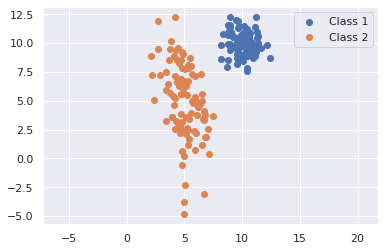

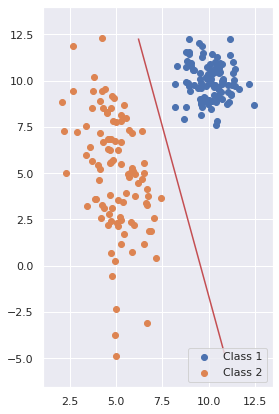

In [59]:
# Answer
X1 = gaussian_sample(mu=[5, 5], sigma1=10, sigma2=1, theta=30, n=100)
X2 = gaussian_sample(mu=[10, 10], n=100)
plotXY(X1, X2, legend=True)
X = np.concatenate((X1, X2))
y = np.concatenate((np.ones((X1.shape[0], 1)), -np.ones((X2.shape[0], 1)))).squeeze()
lda = myLDA(prior=True)
lda.fit(X, y)
print("LDA parameters:")
print(lda.direction_ / np.linalg.norm(lda.direction_), lda.intercept_ / np.linalg.norm(lda.direction_))

plot_frontiere(lda, data=X, data_labels=y)


In [31]:

# Answer
from sklearn.base import BaseEstimator
from sklearn.discriminant_analysis import LinearClassifierMixin

class myQDA(BaseEstimator, LinearClassifierMixin):
    """
        QDA classifier for two classes.
    """
    def __init__(self, prior=None):
        """
            prior: whether to use prior in the intercept. Default is false.
        """
        self.prior = prior
        
    def fit(self, X, y):
        # Estimate covariance matrix and means
        # Todo

        # End todo
        if not self.prior:
            pi1, pi2 = 0.5, 0.5
        else:
            pi1, pi2 = np.mean(y == y.max()), np.mean(y == y.min())
        # Compute direction and intercept
        # Todo
        X1 = X[y == y.max(),:]
        X2 = X[y == y.min(),:]
#         y1 = y[y == y.max()]
#         y2 = y[y == y.min()]
        self.mu1 = X1.mean(axis=0)
        self.mu2 = X2.mean(axis=0)
        self.cov1 = np.cov(X1.T)
        self.cov2 = np.cov(X2.T)
        self.inv_cov1 = np.linalg.inv(cov1)
        self.inv_cov2 = np.linalg.inv(cov2) 
        self.intercept_ = (1/2) * (self.mu1@self.inv_cov1@self.mu1.T - self.mu2@self.inv_cov2@self.mu2.T) - (1/2)*np.log(np.linalg.det(self.cov2)/np.linalg.det(self.cov1)) + np.log(pi1/pi2) 
        # End todo
        return self

    def decision_function(self, X):
        # Compute decisions
        # Todo
        decisions =  (1/2) * np.sum((self.inv_cov1 - self.inv_cov2)@X.T * X.T, axis=0) + (self.mu2@self.inv_cov2 - self.mu1@self.inv_cov1)@X.T + self.intercept_
        print('decision shape:', decisions.shape)
        # End todo
        return decisions

    def predict(self, X):
        # Compute predictions
        # Todo
        decisions = self.decision_function(X)
        predictions = (decisions > 0) * 2 - 1
        # End todo
        return predictions

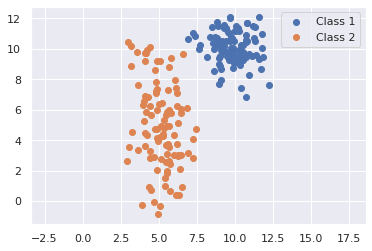

In [9]:
X1 = gaussian_sample(mu=[5, 5], sigma1=10, sigma2=1, theta=30, n=100)
X2 = gaussian_sample(mu=[10, 10], n=100)
plotXY(X1, X2, legend=True)
X = np.concatenate((X1, X2))
y = np.concatenate((np.ones((X1.shape[0], 1)), -np.ones((X2.shape[0], 1)))).squeeze()

X1 = X[y == y.max(),:]
X2 = X[y == y.min(),:]
#         y1 = y[y == y.max()]
#         y2 = y[y == y.min()]
mu1 = X1.mean(axis=0)
mu2 = X2.mean(axis=0)
cov1 = np.cov(X1.T)
cov2 = np.cov(X2.T)
inv_cov1 = np.linalg.inv(cov1)
inv_cov2 = np.linalg.inv(cov2) 

myQDA parameters:
decision shape: (25000,)


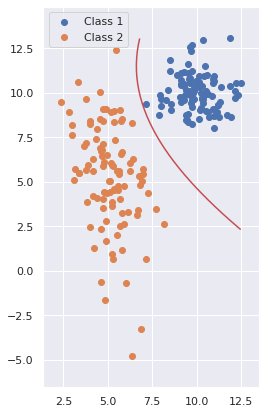

In [34]:
# Answer

qda = myQDA(prior=True)
qda.fit(X, y)
print("myQDA parameters:")
plot_frontiere(qda, data=X, data_labels=y)

In [22]:
a = np.array([[1,2],[3,4],[5,6]])
a.shape

(3, 2)

In [26]:
a

array([[1, 2],
       [3, 4],
       [5, 6]])

In [29]:
(a.T * a.T).sum(axis=0)

array([ 5, 25, 61])

In [30]:
(a.T * a.T).shape

(2, 3)

decision shape: (2,)


array([-1, -1])

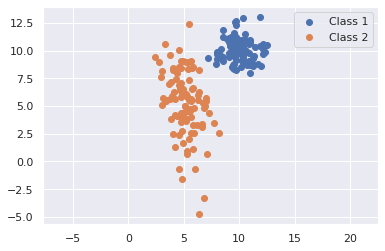

In [32]:
X1 = gaussian_sample(mu=[5, 5], sigma1=10, sigma2=1, theta=30, n=100)
X2 = gaussian_sample(mu=[10, 10], n=100)
plotXY(X1, X2, legend=True)
X = np.concatenate((X1, X2))
y = np.concatenate((np.ones((X1.shape[0], 1)), -np.ones((X2.shape[0], 1)))).squeeze()
qda = myQDA(prior=True)
qda.fit(X, y)
qda.predict(np.array([[1,2],[2,1]]))

In [35]:
# Answer
X1 = gaussian_sample(mu=[5, 5], sigma1=10, sigma2=1, theta=30, n=100)
X2 = gaussian_sample(mu=[10, 10], n=100)
X = np.concatenate((X1, X2))
y = np.concatenate((np.ones((X1.shape[0], 1)), -np.ones((X2.shape[0], 1)))).squeeze()

In [36]:
X1 = X[y == y.max(),:]
X2 = X[y == y.min(),:]
#         y1 = y[y == y.max()]
#         y2 = y[y == y.min()]
mu1 = X1.mean(axis=0)
mu2 = X2.mean(axis=0)
cov1 = np.cov(X1.T)
cov2 = np.cov(X2.T)
inv_cov1 = np.linalg.inv(cov1)
inv_cov2 = np.linalg.inv(cov2)

In [45]:
(inv_cov1 - inv_cov2)

array([[-0.30023812,  0.00626597],
       [ 0.00626597, -0.79328352]])

In [43]:
(1/2) * X@(inv_cov1 - inv_cov2)@X.T + (mu2@inv_cov2 - mu1@inv_cov1)@X.T

array([[ 12.90099038,  68.22216758, 101.62889238, ..., 185.32228432,
        181.34811306, 154.0461684 ],
       [ 17.5323774 ,  59.09229997,  87.6773961 , ..., 162.09660318,
        156.66241001, 135.29214553],
       [ 18.03172025,  54.77001415,  81.16591065, ..., 150.68153261,
        145.0866165 , 125.91785936],
       ...,
       [ 17.43512109,  44.89923012,  66.39154151, ..., 124.18265808,
        118.7648705 , 104.00134896],
       [ 18.71504216,  44.71912928,  66.05071772, ..., 124.01896283,
        118.20000815, 103.97935144],
       [ 16.9955873 ,  48.9313546 ,  72.46445038, ..., 134.83793108,
        129.56184124, 112.75402137]])

>Compare the result of [scikit-learn LDA](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis) (decision function and frontiere).

LDA parameters:
[[-0.88888365 -0.45813301]] [10.07639428]


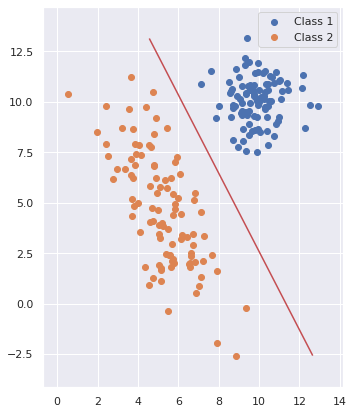

In [33]:
# Answer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda2 = LinearDiscriminantAnalysis()
lda2.fit(X, y)
print("LDA parameters:")
print(lda2.coef_ / np.linalg.norm(lda2.coef_), lda2.intercept_ / np.linalg.norm(lda2.coef_))

plot_frontiere(lda2, X, y)

## Quadratic discriminant analysis <a id="part1sec2"></a>
>Analyze the behavior of LDA and [QDA](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html#sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis) when it is faced to anisotropic Gaussian samples (in particular, check if the frontiere is the bisector of the line segment for which the extremities are both class centers), and then to Gaussian samples with different covariance matrices (you can use `plot_frontiere` with a list of classifiers).

<Figure size 720x1440 with 0 Axes>

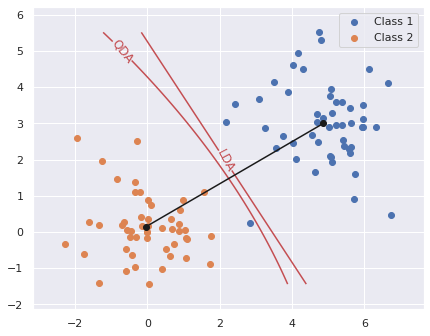

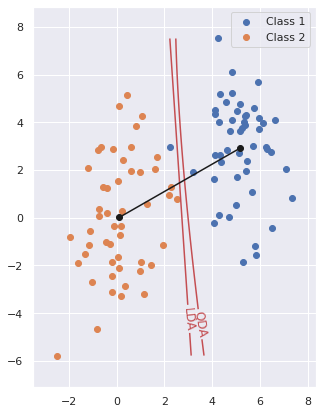

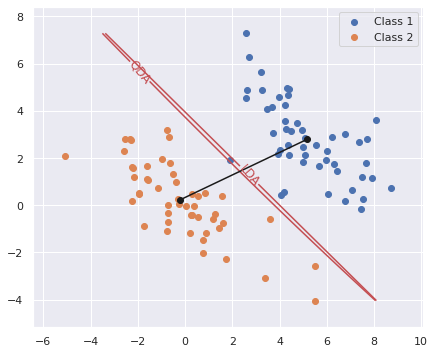

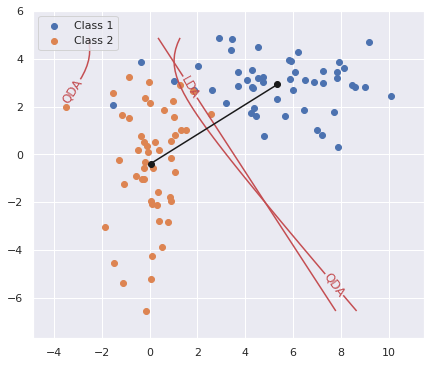

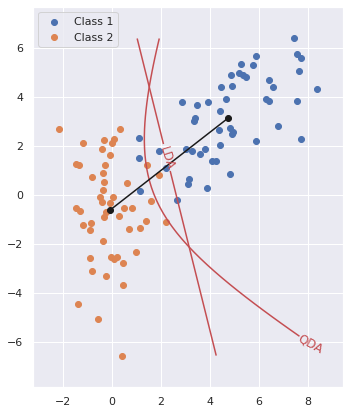

In [64]:
# Answer
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
lda = LinearDiscriminantAnalysis()

# Gassian parameters
mu1 = mu = [0, 0]
mu2 = [5, 3]

plt.figure(figsize=(10, 20))
for (p1, p2) in [((1, 1, 0), ) * 2,
                  ((1, 5, 0), ) * 2,
                  ((1, 5, np.pi/6), ) * 2,
                  ((1, 5, 0), (5, 1, 0)),
                  ((1, 5, 0), (5, 1, np.pi/3))]:
    # Dataset
    # Todo
    X1 = gaussian_sample(mu1, *p1)
    X2 = gaussian_sample(mu2, *p2)
    X = np.r_[X1, X2]
    Y = np.r_[np.ones(X1.shape[0]), -np.ones(X2.shape[0])]
    # End todo
    
    # Discriminant analysis
    # Todo
    qda.fit(X, Y)
    lda.fit(X, Y)
    # End todo
    
    # Class means
    # Todo
    mu1_emp = X[Y==Y.max()].mean(axis=0)
    mu2_emp = X[Y==Y.min()].mean(axis=0)
    # End todo
    
    # Plot frontieres and class means
    # Todo
    plot_frontiere([lda, qda], X, Y, label=["LDA", "QDA"])
    plt.plot([mu1_emp[0], mu2_emp[0]], [mu1_emp[1], mu2_emp[1]], 'ko-')
    # End todo

## Fisher discriminant analysis <a id="part1sec3"></a>
>Implement the Fisher discriminant analysis based on the following code.
In practice, what is the difference between LDA and FisherDA?

In [9]:
class FisherDA(BaseEstimator, LinearClassifierMixin):
    """
        Fisher discriminant analysis for two classes.
    """
    def fit(self, X, y):
        pass

    def decision_function(self, X):
        pass

    def predict(self, X):
        pass

In [108]:
# Answer
class FisherDA(BaseEstimator, LinearClassifierMixin):
    """
        Fisher discriminant analysis for two classes.
    """
    def fit(self, X, y):
        # Estimate prior, covariance matrix and means
        # To do
        pi1, pi2 = np.mean(y == y.max()), np.mean(y == y.min())
        mu1 = X[y == y.max()].mean(axis=0)
        mu2 = X[y == y.min()].mean(axis=0)
        cov1 = (X[y == y.max()] - mu1).T @ (X[y == y.max()] - mu1)
        cov2 = (X[y == y.min()] - mu2).T @ (X[y == y.min()] - mu2)
        cov = pi1*cov1 + pi2 *cov2
        cov_inv = np.linalg.inv(cov)
        # End todo
        
        # Compute direction and intercept
        # Todo
        self.direction_ = cov_inv @ (mu1 - mu2)
        self.intercept_ = 0
        # we need to find empirique optimal intercept
        projections = self.decision_function(X)
        ind = np.argsort(projections)
        y_ordered_by_direction = y[ind]
        # our step will by on these projection points
        accumulated_corrected = np.cumsum((y_ordered_by_direction == y.min()) * 2 - 1)
        index_intercept = np.argmax(accumulated_corrected)
        if index_intercept < y.size-1:
            self.intercept_ = -0.5*(projections[ind[index_intercept]] + projections[ind[index_intercept+1]])
        else:
            self.intercept_ = -projections[ind[index_intercept]]
        
        # End todo
        return self

    def decision_function(self, X):
        # Compute decisions
        # Todo
        decisions = X @ self.direction_ + self.intercept_
        # End todo
        return decisions

    def predict(self, X):
        # Compute predictions
        # Todo
        predictions = (self.decision_function(X) > 0)*2 - 1
        # End todo
        return predictions

In [8]:
a = np.array([0,3,1,5,6,4])
np.argsort(a)

array([0, 2, 1, 5, 3, 4])

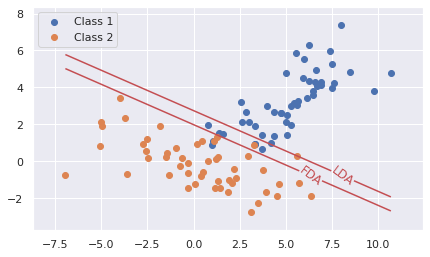

In [110]:
# Answer
X1 = gaussian_sample(mu=[0, 0], sigma1=8, theta=-np.pi/6)
X2 = gaussian_sample(mu=[5, 3], sigma1=8, theta=np.pi/3)

X = np.r_[X1, X2]
Y = np.r_[np.ones(X1.shape[0]), -np.ones(X2.shape[0])]

lda = LinearDiscriminantAnalysis()
lda.fit(X, Y)

fda = FisherDA()
fda.fit(X, Y)

plot_frontiere([lda, fda], X, Y, label=["LDA", "FDA"])

I think maybe FDA consider the influence of variate covariance and it's intercept consider more the samples at border.

# Logistic regression <a id="part2"></a>
>We consider that $X|Y=1 \sim \mathcal N(0, I)$ and $X|Y=-1 \sim 0.5 \mathcal N\left(\begin{pmatrix} 5 \\ 3 \end{pmatrix}, I\right) + 0.5 \mathcal N\left(\begin{pmatrix} 8 \\ 9 \end{pmatrix}, I\right)$ (non-Gaussian class).
Compare LDA and [logistic regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

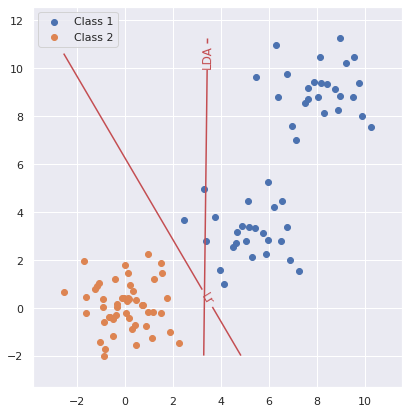

In [33]:
# Answer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

random_state=0
X_Y1 = gaussian_sample(mu=[0, 0], sigma1=1., sigma2=1., theta=0., n=50, random_state=random_state)
X_Y2 = gaussian_sample(mu=[5, 3], sigma1=1., sigma2=1., theta=0., n=25, random_state=random_state)
X_Y3 = gaussian_sample(mu=[8, 9], sigma1=1., sigma2=1., theta=0., n=25, random_state=random_state)
X = np.r_[X_Y1, X_Y2, X_Y3]
Y = np.r_[np.ones(X_Y1.shape[0]), -np.ones(X_Y2.shape[0]), -np.ones(X_Y3.shape[0])]

lr = LogisticRegression(random_state=0).fit(X, Y)
lr.fit(X, Y)

lda = LinearDiscriminantAnalysis()
lda.fit(X, Y)

plot_frontiere([lr, lda], X, Y, label=["Lr", "LDA"])


>What about with this dataset (class $-1$ is Gaussian but with an outlier)?

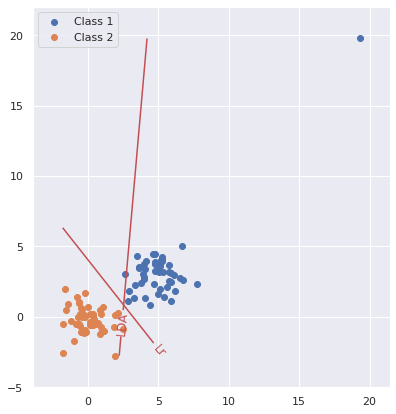

In [34]:
# Dataset
X1 = gaussian_sample(mu=[0, 0])
X2 = gaussian_sample(mu=[5, 3], n=49)
X3 = gaussian_sample(mu=[20, 20], n=1).reshape(1, -1)

X = np.r_[X1, X2, X3]
Y = np.r_[np.ones(X1.shape[0]), -np.ones(X2.shape[0]), -np.ones(X3.shape[0])]
# Answer

lr = LogisticRegression(random_state=0).fit(X, Y)
lr.fit(X, Y)

lda = LinearDiscriminantAnalysis()
lda.fit(X, Y)

plot_frontiere([lr, lda], X, Y, label=["Lr", "LDA"])

# Adaboost <a id="part3"></a>
>We consider the dataset defined below.

In [15]:
# Dataset
X1 = gaussian_sample(mu=[0, 0], sigma1=10, theta=np.pi/6)
X2 = gaussian_sample(mu=[5, 3], sigma1=3, sigma2=10, theta=np.pi/6, n=50)
X3 = gaussian_sample(mu=[-5, -2], sigma1=3, sigma2=10, theta=np.pi/10, n=50)

X = np.r_[X1, X2, X3]
Y = np.r_[np.ones(X1.shape[0]), -np.ones(X2.shape[0]), -np.ones(X3.shape[0])]

>Fit an [Adaboost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) classifier with $100$ weak learners and the algorithm SAMME.
Map the classifier regions on a figure.

In [ ]:
# Answer

>Plot on a new figure the estimator errors (attribute `estimator_errors_`).
What do you observe?

In [ ]:
# Answer

>Load the [dataset digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits).
How many observations, covariates and classes has it?
[Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) the dataset into two equally sized subsets (one for training, the other for testin, i.e. estimating the true error).

In [ ]:
# Answer

>Plot the train and test errors of both algorithms SAMME and SAMME.R with respect to the number of iterations (from 1 to 200) for the dataset digits.
For this purpose, use [`DecisionTreeClassifier(max_depth=5)`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) as base learner.

In [ ]:
# Answer

In [ ]:
class AdaBoost(object):
    def __init__(self, M, clf, learning_rate=1.0, method="discrete", tol=None, weight_trimming=None):
        self.M = M
        self.clf = clf
        self.learning_rate = learning_rate
        self.method = method
        self.tol = tol
        self.weight_trimming = weight_trimming

    def fit(self, X, y):
        # tol为early_stopping的阈值，如果使用early_stopping，则从训练集中分出验证集
        if self.tol is not None:      
            X, X_val, y, y_val = train_test_split(X, y, random_state=2)  
            former_loss = 1
            count = 0
            tol_init = self.tol

        w = np.array([1 / len(X)] * len(X))   # 初始化权重为1/n
        self.clf_total = []
        self.alpha_total = []

        for m in range(self.M):
            classifier = clone(self.clf)
            if self.method == "discrete":
                if m >= 1 and self.weight_trimming is not None:
                    # weight_trimming的实现，先将权重排序，计算累积和，再去除权重过小的样本
                    sort_w = np.sort(w)[::-1]     
                    cum_sum = np.cumsum(sort_w)   
                    percent_w = sort_w[np.where(cum_sum >= self.weight_trimming)][0]   
                    w_fit, X_fit, y_fit = w[w >= percent_w], X[w >= percent_w], y[w >= percent_w]
                    y_pred = classifier.fit(X_fit, y_fit, sample_weight=w_fit).predict(X)

                else:
                    y_pred = classifier.fit(X, y, sample_weight=w).predict(X)
                loss = np.zeros(len(X))
                loss[y_pred != y] = 1
                err = np.sum(w * loss)    # 计算带权误差率
                alpha = 0.5 * np.log((1 - err) / err) * self.learning_rate  # 计算基学习器的系数alpha
                w = (w * np.exp(-y * alpha * y_pred)) / np.sum(w * np.exp(-y * alpha * y_pred))  # 更新权重分布

                self.alpha_total.append(alpha)
                self.clf_total.append(classifier)

            elif self.method == "real":
                if m >= 1 and self.weight_trimming is not None:
                    sort_w = np.sort(w)[::-1]
                    cum_sum = np.cumsum(sort_w)
                    percent_w = sort_w[np.where(cum_sum >= self.weight_trimming)][0]
                    w_fit, X_fit, y_fit = w[w >= percent_w], X[w >= percent_w], y[w >= percent_w]
                    y_pred = classifier.fit(X_fit, y_fit, sample_weight=w_fit).predict_proba(X)[:, 1]

                else:
                    y_pred = classifier.fit(X, y, sample_weight=w).predict_proba(X)[:, 1]  
                y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
                clf = 0.5 * np.log(y_pred / (1 - y_pred)) * self.learning_rate
                w = (w * np.exp(-y * clf)) / np.sum(w * np.exp(-y * clf))

                self.clf_total.append(classifier)

            '''early stopping'''
            if m % 10 == 0 and m > 300 and self.tol is not None:
                if self.method == "discrete":
                    p = np.array([self.alpha_total[m] * self.clf_total[m].predict(X_val) for m in range(m)])
                elif self.method == "real":
                    p = []
                    for m in range(m):
                        ppp = self.clf_total[m].predict_proba(X_val)[:, 1]
                        ppp = np.clip(ppp, 1e-15, 1 - 1e-15)
                        p.append(self.learning_rate * 0.5 * np.log(ppp / (1 - ppp)))
                    p = np.array(p)

                stage_pred = np.sign(p.sum(axis=0))
                later_loss = zero_one_loss(stage_pred, y_val)

                if later_loss > (former_loss + self.tol):
                    count += 1
                    self.tol = self.tol / 2  
                else:
                    count = 0
                    self.tol = tol_init
                if count == 2:
                    self.M = m - 20
                    print("early stopping in round {}, best round is {}, M = {}".format(m, m - 20, self.M))
                    break
                former_loss = later_loss

        return self

    def predict(self, X):
        if self.method == "discrete":
            pred = np.array([self.alpha_total[m] * self.clf_total[m].predict(X) for m in range(self.M)])

        elif self.method == "real":
            pred = []
            for m in range(self.M):
                p = self.clf_total[m].predict_proba(X)[:, 1]
                p = np.clip(p, 1e-15, 1 - 1e-15)
                pred.append(0.5 * np.log(p / (1 - p)))

        return np.sign(np.sum(pred, axis=0))


if __name__ == "__main__":
    #测试各模型的准确率和耗时
    X, y = datasets.make_hastie_10_2(n_samples=20000, random_state=1)   # data
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    start_time = time.time()
    model_discrete = AdaBoost(M=2000, clf=DecisionTreeClassifier(max_depth=1, random_state=1), learning_rate=1.0, 
                              method="discrete", weight_trimming=None)
    model_discrete.fit(X_train, y_train)
    pred_discrete = model_discrete.predict(X_test)
    acc = np.zeros(pred_discrete.shape)
    acc[np.where(pred_discrete == y_test)] = 1
    accuracy = np.sum(acc) / len(pred_discrete)
    print('Discrete Adaboost accuracy: ', accuracy)
    print('Discrete Adaboost time: ', '{:.2f}'.format(time.time() - start_time),'\n')


    start_time = time.time()
    model_real = AdaBoost(M=2000, clf=DecisionTreeClassifier(max_depth=1, random_state=1), learning_rate=1.0, 
                          method="real", weight_trimming=None)
    model_real.fit(X_train, y_train)
    pred_real = model_real.predict(X_test)
    acc = np.zeros(pred_real.shape)
    acc[np.where(pred_real == y_test)] = 1
    accuracy = np.sum(acc) / len(pred_real)
    print('Real Adaboost accuracy: ', accuracy)  
    print("Real Adaboost time: ", '{:.2f}'.format(time.time() - start_time),'\n')

    start_time = time.time()
    model_discrete_weight = AdaBoost(M=2000, clf=DecisionTreeClassifier(max_depth=1, random_state=1), learning_rate=1.0, 
                                     method="discrete", weight_trimming=0.995)
    model_discrete_weight.fit(X_train, y_train)
    pred_discrete_weight = model_discrete_weight.predict(X_test)
    acc = np.zeros(pred_discrete_weight.shape)
    acc[np.where(pred_discrete_weight == y_test)] = 1
    accuracy = np.sum(acc) / len(pred_discrete_weight)
    print('Discrete Adaboost(weight_trimming 0.995) accuracy: ', accuracy)
    print('Discrete Adaboost(weight_trimming 0.995) time: ', '{:.2f}'.format(time.time() - start_time),'\n')

    start_time = time.time()
    mdoel_real_weight = AdaBoost(M=2000, clf=DecisionTreeClassifier(max_depth=1, random_state=1), learning_rate=1.0, 
                                     method="real", weight_trimming=0.999)
    mdoel_real_weight.fit(X_train, y_train)
    pred_real_weight = mdoel_real_weight.predict(X_test)
    acc = np.zeros(pred_real_weight.shape)
    acc[np.where(pred_real_weight == y_test)] = 1
    accuracy = np.sum(acc) / len(pred_real_weight)
    print('Real Adaboost(weight_trimming 0.999) accuracy: ', accuracy)
    print('Real Adaboost(weight_trimming 0.999) time: ', '{:.2f}'.format(time.time() - start_time),'\n')

    start_time = time.time()
    model_discrete = AdaBoost(M=2000, clf=DecisionTreeClassifier(max_depth=1, random_state=1), learning_rate=1.0, 
                              method="discrete", weight_trimming=None, tol=0.0001)
    model_discrete.fit(X_train, y_train)
    pred_discrete = model_discrete.predict(X_test)
    acc = np.zeros(pred_discrete.shape)
    acc[np.where(pred_discrete == y_test)] = 1
    accuracy = np.sum(acc) / len(pred_discrete)
    print('Discrete Adaboost accuracy (early_stopping): ', accuracy)
    print('Discrete Adaboost time (early_stopping): ', '{:.2f}'.format(time.time() - start_time),'\n')

    start_time = time.time()
    model_real = AdaBoost(M=2000, clf=DecisionTreeClassifier(max_depth=1, random_state=1), learning_rate=1.0, 
                          method="real", weight_trimming=None, tol=0.0001)
    model_real.fit(X_train, y_train)
    pred_real = model_real.predict(X_test)
    acc = np.zeros(pred_real.shape)
    acc[np.where(pred_real == y_test)] = 1
    accuracy = np.sum(acc) / len(pred_real)
    print('Real Adaboost accuracy (early_stopping): ', accuracy)  
    print('Discrete Adaboost time (early_stopping): ', '{:.2f}'.format(time.time() - start_time),'\n')